In [2]:
import xarray as xr 
import numpy as np

In [5]:
lister = ['/glade/derecho/scratch/wchapman/STAGING//ERA5_e5.oper.ml.v3.uvtq.20100101.nc', '/glade/derecho/scratch/wchapman/STAGING//ERA5_e5.oper.ml.v3.uvtq.20100102.nc', '/glade/derecho/scratch/wchapman/STAGING//ERA5_e5.oper.ml.v3.uvtq.20100103.nc']


xr.open_mfdataset(lister,parallel=True)



<xarray.Dataset>
Dimensions:     (time: 72, level: 15, latitude: 640, longitude: 1280,
                 half_level: 138)
Coordinates:
  * half_level  (half_level) int32 1 2 3 4 5 6 7 ... 132 133 134 135 136 137 138
  * latitude    (latitude) float64 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * level       (level) int32 10 30 40 50 60 70 80 90 95 100 105 110 120 130 136
  * longitude   (longitude) float64 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * time        (time) datetime64[ns] 2010-01-01 ... 2010-01-03T23:00:00
Data variables:
    U           (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 15, 640, 1280), meta=np.ndarray>
    V           (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 15, 640, 1280), meta=np.ndarray>
    T           (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 15, 640, 1280), meta=np.ndarray>
    Q           (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 15, 640, 1280), meta=np.ndarray>
    SP          (time, latitude, longitude) float32 dask.array<chunksize=(24, 640, 1280), meta=np.ndarray>
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    cheyenne node employed: Linux r2i...
    CONVERSION_AND_COMPRSSION_DATE:         Sat Dec 24 17:14:38 MST 2022
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Sat Dec 24 17:14:51 2022: ncks -4...
    NCO:                                    netCDF Operators version 5.0.3 (H...

In [31]:
DS = xr.open_dataset('/glade/derecho/scratch/wchapman/ERA5_regrid_out/ERA5_e5.oper.ml.v3.uvtq.2014021518.nc').sel(level=[10,30,40,50,60,70,80,90,95,100,105,110,120,130,136]).drop(['weight','utc_date','a_half','zero','a_model','b_model','b_half'])
DS2 = xr.open_dataset('/glade/derecho/scratch/wchapman/ERA5_regrid_out/ERA5_e5.oper.ml.v3.ps.2014021518.nc').drop(['weight','utc_date','zero'])
DS = xr.merge([DS,DS2])

In [35]:
DS['time'].shape

()

In [25]:
DD = np.array(DS.drop(['Z_GDS4_SFC','US','VS']))

<xarray.Dataset>
Dimensions:     (level: 15, latitude: 640, longitude: 1280, half_level: 138)
Coordinates:
  * half_level  (half_level) int32 1 2 3 4 5 6 7 ... 132 133 134 135 136 137 138
  * latitude    (latitude) float64 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * level       (level) int32 10 30 40 50 60 70 80 90 95 100 105 110 120 130 136
  * longitude   (longitude) float64 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
    time        datetime64[ns] 2014-02-15T18:00:00
Data variables:
    U           (level, latitude, longitude) float32 ...
    V           (level, latitude, longitude) float32 ...
    T           (level, latitude, longitude) float32 ...
    Q           (level, latitude, longitude) float32 ...
    SP          (latitude, longitude) float32 ...
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    cheyenne node employed: Linux r11...
    CONVERSION_AND_COMPRSSION_DATE:         Mon Jan  2 17:43:15 MST 2023
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Mon Jan  2 17:43:36 2023: ncks -4...
    NCO:                                    netCDF Operators version 5.0.3 (H...

In [2]:
DD = np.load('/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010121.npy')

In [30]:
DD.shape

(5, 15, 640, 1280)

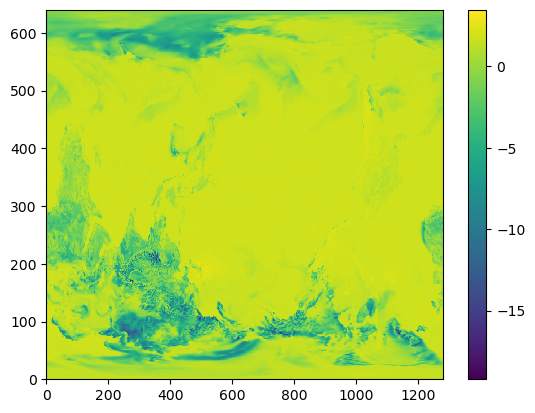

In [12]:
import matplotlib.pyplot as plt
plt.pcolor(DD[2,14,:,:]-DD[2,13,:,:])
plt.colorbar()
plt.show()

In [29]:
FPout + file_pattern

'/glade/derecho/scratch/wchapman/STAGING/*203912*.npy'

In [28]:
import glob
import os
FPout = '/glade/derecho/scratch/wchapman/STAGING/' #where do you want the files stored?
# for yryr in np.arange(1979,2040):
#     yryrstr = str(np.char.zfill(str(yryr),4))
#     for momo in np.arange(1,13):
#         momostr = str(np.char.zfill(str(momo),2))
#         # Directory containing .npy files
#         # Pattern to match .npy files
            
            
            
#         file_pattern = '*'+yryrstr+momostr+'*.npy'

#         # Get a list of file paths
#         file_paths = sorted(glob.glob(FPout + file_pattern))[:30]
#         ff = 'ERA5_e5.'+yryrstr+momostr+'.npy'
            
#         if len(file_paths)==0:
#             continue 
            
#         dirfinout = '/glade/derecho/scratch/wchapman/STAGING/STAGING_MON/'
#         fffinout  = '/ERA5_e5.'+yryrstr+momostr+'.npy'
#         if os.path.exists(dirfinout+fffinout):
#             continue
            
        print(file_paths)
        print('hi')
            
            

['/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010100.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010101.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010102.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010103.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010104.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010105.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010106.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010107.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010108.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010109.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010110.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010111.npy', '/glade/derecho

In [19]:
len(file_paths)

7